In [95]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
# Interactive widgets
from ipywidgets import widgets

In [ ]:
TRAIN_DIR = 'archive/Train'

print(f"files in this director: {os.listdir()}")

car_brands_main_directory = os.listdir(TRAIN_DIR)

print(f"the subdirectories within {TRAIN_DIR}: {car_brands_main_directory}")

files in this director: ['archive', 'model.ipynb']
the subdirectories within archive/Train: ['hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'skoda', 'toyota', 'volkswagen']


In [97]:
# car_brands

for car_name in car_brands_main_directory:
    car_brand_directory = os.path.join(TRAIN_DIR, car_name)
    car_brand_image_names = os.listdir(car_brand_directory)
    print(f"the subdirectories are:{car_brand_directory} ")
    print(f"number of images in {car_brand_directory}: {len(os.listdir(car_brand_directory))}")
    print(f"5 files in this subdir: {car_brand_image_names[:5]}")
    print("\n")

print(f"total car brands: {len(car_brands_main_directory)}")

the subdirectories are:archive/Train/hyundai 
number of images in archive/Train/hyundai: 289
5 files in this subdir: ['11.5cm20x205.5cm-1024x768.jpg', '112886.jpg', '1_org_zoom.jpg', '2223.jpg', '41Vb8kVGvJL._AC_SS450_.jpg']


the subdirectories are:archive/Train/lexus 
number of images in archive/Train/lexus: 296
5 files in this subdir: ['-march-lexus-logo-sign-store-front-lexus-japanese-brand-automotive-113350042.jpg', '000003.jpg', '1062596372_w640_h640_emblema-lexus-150h106.jpg', '1974456.jpg', '1974460.jpg']


the subdirectories are:archive/Train/mazda 
number of images in archive/Train/mazda: 314
5 files in this subdir: ['-FAST-SHIPPING-Chrome-MazDa-Sticker-3D-MazDa-Logo-Badge-Decal-For-MazDa-3-6-Head.jpg', '-photocharacteristicdetail-usage-worldwide-credit-dpaalamy-live-news-2BPG7FD.jpg', '000-3d-model-Mazda2BLogo.jpg', '00000010828.jpg', '0000_51_852.jpg']


the subdirectories are:archive/Train/mercedes 
number of images in archive/Train/mercedes: 329
5 files in this subdir: ['

## There are some invalid images that are not accepted by the TensorFlow data pipeline:

- removing dodgy images


### The code below is something I found useful online. Some of my files did not work with the TensorFlow utils which was confusing hence this help remove files that are not recognized by the two libraries:
- cv2
- imghdr

basically the code below is preprocessing data

In [98]:
import cv2
import imghdr

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(TRAIN_DIR): 
    for image in os.listdir(os.path.join(TRAIN_DIR, image_class)):
        image_path = os.path.join(TRAIN_DIR, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Corrupt JPEG data: 7 extraneous bytes before marker 0xee


(batch_size, height, width, channels) = (32, 256, 256, 3)

In [99]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



To print all the file types

In [100]:
extensions = set()

for root, dirs, files in os.walk(TRAIN_DIR):
    for file in files:
        _, ext = os.path.splitext(file)
        ext = ext.lower()
        extensions.add(ext)

print("File extensions found:")
for ext in sorted(extensions):
    print(ext)

File extensions found:
.jpg


my questions:

- How can I make my model work for images sizes that are not all the same. 

- There is no built in dynamic graphs in TensorFlow. Two options:

1. Bucketing: You create multiple input tensors in a few hand picked sizes and then in runtime you choose the right bucket (see example). Either way you'll probably need the second option.

2. Resize the input and output images. Assuming the images all maintain the same aspect ration you can try resizing the image before inference. Not sure why you care about the output since MNIST is a classification task.


## LOAD DATA

## To see the the average size of images

In [101]:
from PIL import Image

total_width = 0
total_height = 0
image_count = 0

for folder in os.listdir(TRAIN_DIR):
    folder_path = os.path.join(TRAIN_DIR, folder)
    if not os.path.isdir(folder_path):
        continue
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                total_width += width
                total_height += height
                image_count += 1
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

if image_count > 0:
    avg_width = total_width / image_count
    avg_height = total_height / image_count
    avg_ratio = avg_width / avg_height

    print(f"Average width: {avg_width:.2f}")
    print(f"Average height: {avg_height:.2f}")
    print(f"Average width:height ratio: {avg_ratio:.2f}")
else:
    print("No images found.")


Average width: 528.86
Average height: 400.79
Average width:height ratio: 1.32


In [ ]:
# BATCH SIZE I HAVE SET FOR NOW

batch_size = 32
img_height = 256
img_width = int(256 * 1.32) # ~ 338?

In [103]:
#TRAINING
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2446 files belonging to 8 classes.
Using 1957 files for training.


In [104]:
#VALIDATION
val_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2446 files belonging to 8 classes.
Using 489 files for validation.


In [105]:
class_names = train_ds.class_names
print(class_names)

['hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'skoda', 'toyota', 'volkswagen']


## visualizing the data

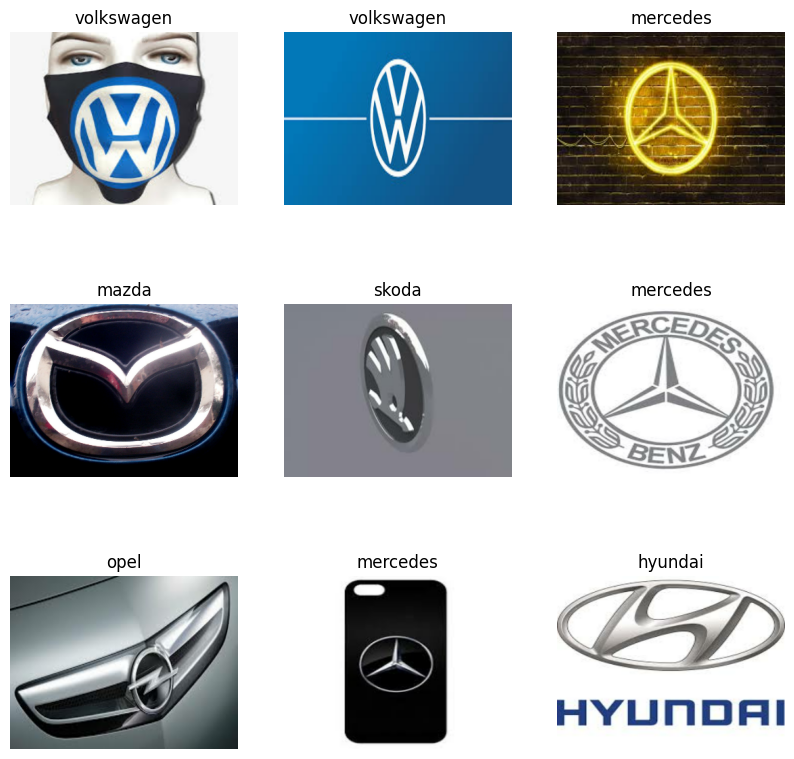

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [107]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 337, 3)
(32,)


## 🚨SOLUTION🚨

- I have applied the validation and default image size for my images which I will have to test on different sizes to
  get the optimal solution 
- check notes/images_tensorflow_guide.ipynb


In [108]:
tf.config.list_physical_devices('GPU')

[]

## Data preprocessing continuation

In [109]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [110]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.027050199 0.9927657


In [111]:
# YOU CAN ALSO DO:
# normalized_ds = train_ds.map(lambda x,y: (x/255, y))

### Why normalization

- Most images store pixel values in the range [0, 255] as uint8 integers. But neural networks — especially those using ReLU, sigmoid, or tanh activations — tend to perform better when inputs are small real numbers, usually in the range [0, 1] or [-1, 1].

My notes:

| Scenario                                         | Should Normalize?                               | Why                                                                       |
| ------------------------------------------------ | ----------------------------------------------- | ------------------------------------------------------------------------- |
| Most image classification models (e.g., CNNs)    | ✅ Yes                                           | Stabilizes training and improves convergence.                             |
| Pretrained models (e.g., ResNet, VGG)            | ⚠️ Yes, but follow their expected input scaling | Some expect \[0, 1], others \[-1, 1], or even specific ImageNet mean/std. |
| Autoencoders, GANs, segmentation                 | ✅ Yes                                           | Helps reconstruct and generate cleaner images.                            |
| Color-sensitive tasks (e.g., colorization)       | ✅ Still normalize                               | But often preserve relative color ratios.                                 |
| Traditional ML on non-image data (e.g., tabular) | Not related                                     | Use other scalers like StandardScaler, MinMaxScaler.                      |


### Configure the dataset for performance

In [112]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## CALLBACK

In [113]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >= 0.95:
            self.model.stop_training = True
            print("\nReached >= 95% validation accuracy. Stopped training")

In [114]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,         # stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

## TRAIN THE MODEL


In [115]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height,img_width,3)),

    #i have normalised on top: normalised_ds
    #but this uses the default: train_ds
    tf.keras.layers.Rescaling(1./255), 

    # Data Augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),

    # tf.keras.layers.Conv2D(32,(3,3), activation='relu')
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    #no parameters in MaxPooling2D takes default: pool_size=(2, 2) 
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # tf.keras.layers.Conv2D(64, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #helps prevent overfitting
    tf.keras.layers.Dense(8,activation='softmax') #number of classes = 8
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 256, 337, 3)       0         
                                                                 
 random_flip_23 (RandomFlip  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 random_rotation_23 (Random  (None, 256, 337, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_23 (RandomZoom  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 conv2d_110 (Conv2D)         (None, 254, 335, 16)      448       
                                                     

Choose the **tf.keras.optimizers.Adam** optimizer and **tf.keras.losses.SparseCategoricalCrossentropy** loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [116]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [117]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  callbacks=[early_stop]
)

Epoch 1/10
 1/62 [..............................] - ETA: 55s - loss: 2.1155 - accuracy: 0.0312

Corrupt JPEG data: 7 extraneous bytes before marker 0xee


62/62 [==============================] - 16s 240ms/step - loss: 2.1254 - accuracy: 0.1523 - val_loss: 2.0480 - val_accuracy: 0.1984
Epoch 2/10
62/62 [==============================] - 14s 229ms/step - loss: 1.9216 - accuracy: 0.2994 - val_loss: 1.7823 - val_accuracy: 0.3742
Epoch 3/10
62/62 [==============================] - 15s 236ms/step - loss: 1.6092 - accuracy: 0.4313 - val_loss: 1.5674 - val_accuracy: 0.4724
Epoch 4/10
62/62 [==============================] - 15s 241ms/step - loss: 1.3954 - accuracy: 0.5289 - val_loss: 1.4234 - val_accuracy: 0.5256
Epoch 5/10
62/62 [==============================] - 15s 242ms/step - loss: 1.2525 - accuracy: 0.5820 - val_loss: 1.2810 - val_accuracy: 0.5542
Epoch 6/10
62/62 [==============================] - 15s 247ms/step - loss: 1.1490 - accuracy: 0.6290 - val_loss: 1.2795 - val_accuracy: 0.5746
Epoch 7/10
62/62 [==============================] - 15s 241ms/step - loss: 1.0634 - accuracy: 0.6306 - val_loss: 1.2814 - val_accuracy: 0.5869
Epoch 8/10

## MY MODEL IS OVERFITTING

# Demonstrate overfitting - from tensorflow tutorial

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only densely-connected layers (tf.keras.layers.Dense) as a baseline, then create larger models, and compare them.

## Implementing regularization

In [118]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.13.0


In [119]:
!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

/bin/bash: /home/harishi/miniconda3/envs/tf-gpu/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ebynirj3
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-ebynirj3
  Resolved https://github.com/tensorflow/docs to commit 820135c97a66e1368116e411698aa994a6eeb0ce
  Preparing metadata (setup.py) ... done


In [120]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [121]:
# total training size = 1957
# total validation size = 489
STEPS_PER_EPOCH = int(1975 / 32)
STEPS_PER_EPOCH

61

In [122]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH * 5,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

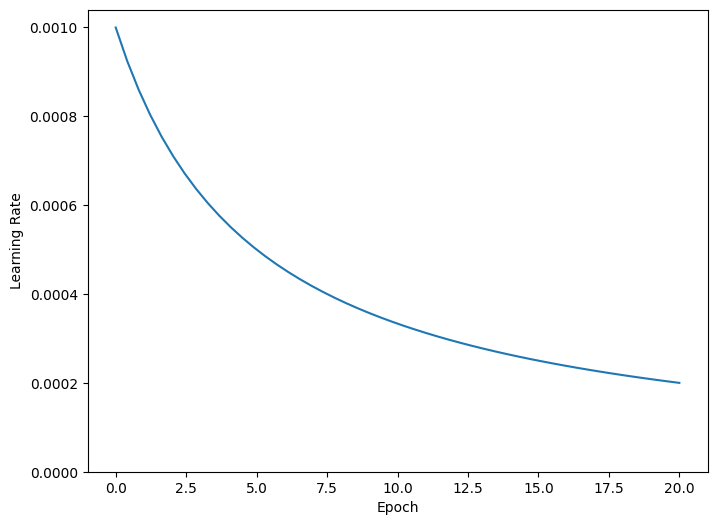

In [123]:
step = np.linspace(0,STEPS_PER_EPOCH * 20)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [124]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [125]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',           # Corrected from 'val_binary_crossentropy'
        patience=10,                  # You can adjust patience as needed
        restore_best_weights=True     # Helps load the best model
    ),
    tf.keras.callbacks.TensorBoard(log_dir=logdir/name),  # Also fixed: log_dir instead of logdir
  ]


In [135]:
# STEPS_PER_EPOCH = len(train_ds) // batch_size
# VALIDATION_STEPS = len(val_ds) // batch_size

# print(STEPS_PER_EPOCH)
# print(VALIDATION_STEPS)

In [154]:
class Model:
    def __init__(self,model, name, optimizer=None):
        self.model = model
        self.name = name
        self.optimizer = optimizer or self.get_optimizer()

    def get_optimizer(self):
        return tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    
    def get_callbacks(self):
        return get_callbacks(self.name)

    def compile(self):
        self.model.compile(
            optimizer = get_optimizer(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
        )
        self.model.summary()

    def fit(self, train_ds, validate_ds, STEPS_PER_EPOCH, VALIDATION_STEPS, max_epochs = 20):
        self.history = self.model.fit(
            train_ds,
            steps_per_epoch=STEPS_PER_EPOCH,
            epochs=max_epochs,
            validation_data=validate_ds,
            validation_steps=VALIDATION_STEPS,
            callbacks=self.get_callbacks(),
            verbose=0
        )

## Starting with tiny model

In [155]:
tiny_model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height,img_width,3)),

    tf.keras.layers.Rescaling(1./255), 

    # Data Augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #helps prevent overfitting
    tf.keras.layers.Dense(8,activation='softmax') #number of classes = 8
])

tiny_model_test = Model(tiny_model, name='tiny_model_classifier')

In [156]:
tiny_model_test.compile()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_34 (Rescaling)    (None, 256, 337, 3)       0         
                                                                 
 random_flip_33 (RandomFlip  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 random_rotation_33 (Random  (None, 256, 337, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_33 (RandomZoom  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 conv2d_159 (Conv2D)         (None, 254, 335, 16)      448       
                                                     

In [157]:
medium_model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height,img_width,3)),

    tf.keras.layers.Rescaling(1./255), 

    # Data Augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #helps prevent overfitting
    tf.keras.layers.Dense(8,activation='softmax') #number of classes = 8
])

medium_model_test = Model(medium_model, name='medium_model_classifier')

In [158]:
medium_model_test.compile()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_35 (Rescaling)    (None, 256, 337, 3)       0         
                                                                 
 random_flip_34 (RandomFlip  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 random_rotation_34 (Random  (None, 256, 337, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_34 (RandomZoom  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 conv2d_165 (Conv2D)         (None, 254, 335, 16)      448       
                                                     

In [159]:
large_model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height,img_width,3)),

    tf.keras.layers.Rescaling(1./255), 

    # Data Augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), #helps prevent overfitting
    tf.keras.layers.Dense(8,activation='softmax') #number of classes = 8
])

large_model_test = Model(large_model, name='large_model_classifier')

In [160]:
large_model_test.compile()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_36 (Rescaling)    (None, 256, 337, 3)       0         
                                                                 
 random_flip_35 (RandomFlip  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 random_rotation_35 (Random  (None, 256, 337, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_35 (RandomZoom  (None, 256, 337, 3)       0         
 )                                                               
                                                                 
 conv2d_170 (Conv2D)         (None, 254, 335, 32)      896       
                                                     

In [ ]:
# Constants
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = int(256 * 1.32)
TRAIN_DIR = 'archive/Train'
SEED = 123

def create_datasets():
    train_ds = tf.keras.utils.image_dataset_from_directory(
        TRAIN_DIR,
        validation_split=0.2,
        subset="training",
        seed=SEED,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    ).repeat()

    val_ds = tf.keras.utils.image_dataset_from_directory(
        TRAIN_DIR,
        validation_split=0.2,
        subset="validation",
        seed=SEED,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    ).repeat()

    return train_ds, val_ds

# Number of steps
STEPS_PER_EPOCH = 1957 // BATCH_SIZE
VALIDATION_STEPS = 489 // BATCH_SIZE

# Train tiny model
train_ds, val_ds = create_datasets()
tiny_model_test.fit(train_ds, val_ds, STEPS_PER_EPOCH, VALIDATION_STEPS, max_epochs=20)

# Train medium model
train_ds, val_ds = create_datasets()
medium_model_test.fit(train_ds, val_ds, STEPS_PER_EPOCH, VALIDATION_STEPS, max_epochs=20)

# Train large model
train_ds, val_ds = create_datasets()
large_model_test.fit(train_ds, val_ds, STEPS_PER_EPOCH, VALIDATION_STEPS, max_epochs=20)


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_histories(model_wrappers):
    plt.figure(figsize=(10, 6))
    
    for wrapper in model_wrappers:
        label = wrapper.name
        loss = wrapper.history.history['val_loss']
        plt.plot(loss, label=label)
    
    plt.xscale('log')
    plt.xlim([5, None])
    plt.ylim([0.0, 1.0])  # You can adjust range as needed
    plt.xlabel("Epochs [Log Scale]")
    plt.ylabel("Validation Loss")
    plt.title("Validation Loss vs Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()


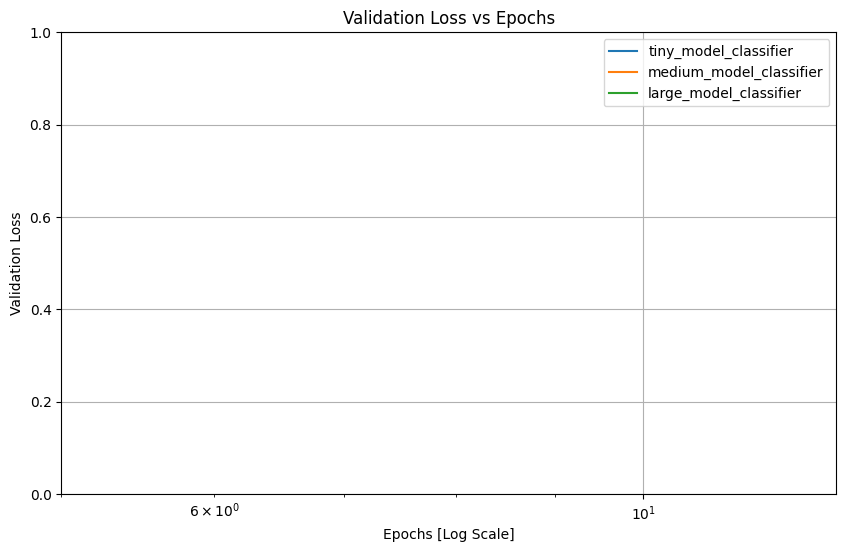

In [ ]:

plot_loss_histories([
    tiny_model_test,
    medium_model_test,
    large_model_test
])